In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [8]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2,2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


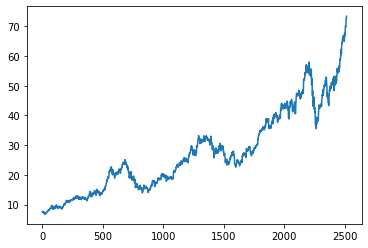

In [11]:
plt.plot(df.Close)

In [12]:
df

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2,2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
...,...,...,...,...,...,...,...,...
2512,2512,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938202
2513,2513,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325813
2514,2514,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298737
2515,2515,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721909


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

([<matplotlib.lines.Line2D at 0x7fa9e7faac70>], 'r')

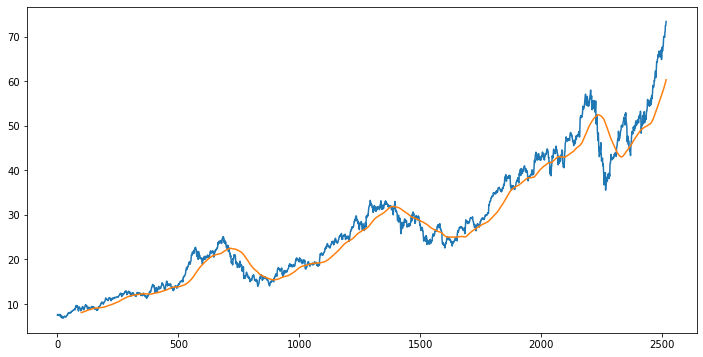

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

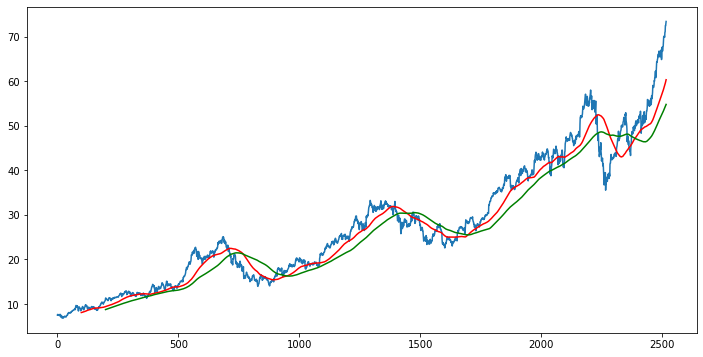

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(2517, 8)

In [22]:
# sPLITTING DATA INTO TRAINING AND TESTING

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(756, 1)


In [23]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [24]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [32]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i-0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
# ML MODEL

In [38]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [41]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 2/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 5/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 7/50
52/52 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 8/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 9/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 10/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 11/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 12/50
52/52 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/50
52/52 [==============================

In [48]:
model.save('keras_model.h5')

In [49]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [50]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [52]:
past_100_days = data_training.tail(100)

In [90]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/tmp/ipykernel_5003/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [91]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [92]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [64]:
input_data.shape

(856, 1)

In [93]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [94]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [95]:
# Making Predictions

y_predicted = model.predict(x_test)

In [96]:
y_predicted.shape

(756, 1)

In [102]:
x_test

array([[[0.0275037 ],
        [0.02981315],
        [0.02556164],
        ...,
        [0.07028133],
        [0.07416547],
        [0.07154107]],

       [[0.02981315],
        [0.02556164],
        [0.02519422],
        ...,
        [0.07416547],
        [0.07154107],
        [0.07138362]],

       [[0.02556164],
        [0.02519422],
        [0.02650642],
        ...,
        [0.07154107],
        [0.07138362],
        [0.06660719]],

       ...,

       [[0.4927042 ],
        [0.5034117 ],
        [0.5264539 ],
        ...,
        [0.94934918],
        [0.9507663 ],
        [0.98036957]],

       [[0.5034117 ],
        [0.5264539 ],
        [0.51364691],
        ...,
        [0.9507663 ],
        [0.98036957],
        [0.97979212]],

       [[0.5264539 ],
        [0.51364691],
        [0.51096998],
        ...,
        [0.98036957],
        [0.97979212],
        [0.98882005]]])

In [97]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [98]:
y_predicted

array([[-9.67691522e-05],
       [-9.95531736e-05],
       [-1.02009370e-04],
       [-1.04120249e-04],
       [-1.05868137e-04],
       [-1.07327884e-04],
       [-1.08638880e-04],
       [-1.09967135e-04],
       [-1.11423476e-04],
       [-1.13077665e-04],
       [-1.14918461e-04],
       [-1.16887699e-04],
       [-1.18964439e-04],
       [-1.21122750e-04],
       [-1.23314225e-04],
       [-1.25498103e-04],
       [-1.27641222e-04],
       [-1.29707987e-04],
       [-1.31768480e-04],
       [-1.33883572e-04],
       [-1.36074348e-04],
       [-1.38309420e-04],
       [-1.40524964e-04],
       [-1.43049241e-04],
       [-1.46134480e-04],
       [-1.49901403e-04],
       [-1.54399095e-04],
       [-1.59662508e-04],
       [-1.65638456e-04],
       [-1.72199376e-04],
       [-1.79138369e-04],
       [-1.86282661e-04],
       [-1.93553322e-04],
       [-2.00886920e-04],
       [-2.08176745e-04],
       [-2.15310982e-04],
       [-2.22228147e-04],
       [-2.28863908e-04],
       [-2.3

In [99]:
scaler.scale_

array([0.02099517])

In [100]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

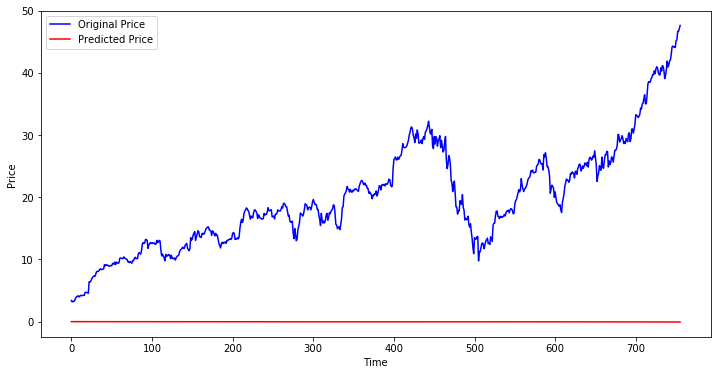

In [101]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()